# Paris NWP runs from polytope
Example for how to extract model level data from polytope and create profiles.

To explore all data available visit https://catalogue.lumi.apps.dte.destination-earth.eu/?class=d1&dataset=on-demand-extremes-dt&expver=aab0&stream=oper

In [1]:
# Import necessary libraries
import os
import earthkit.data
import earthkit.plots
import matplotlib.pyplot as plt
polytope_address="polytope.lumi.apps.dte.destination-earth.eu"

In [2]:
# Client authentification, use if required
#from polytope.api import Client
#client = Client(address=polytope_address)

In [3]:
# Define the request, note that we only extract levtop -> 90 levels to reduce the data amount
levtop = 70
request= {
    "class": "d1",
    "dataset": "on-demand-extremes-dt",
    "expver": "aab0",
    "stream": "oper",
    "date": "2023-08-20",
    "time": "0000",
    "type": "fc",
    "georef": "u09tvk",
    "levtype": "ml",
    "step": list(range(0,37)),
    "levelist": f"{levtop}/to/90",
    "expect" : 0,
    # z,t,u,v,q,w
    "param": ["129","130"],
}


In [4]:
import os
filename = "_".join([x for x in request.values() if isinstance(x,str) and "/" not in x])+ ".grib2"
data_target_path = f"/scratch/{os.environ["USER"]}/{filename}"
data_target_path

'/scratch/snh/d1_on-demand-extremes-dt_aab0_oper_2023-08-20_0000_fc_u09tvk_ml.grib2'

In [5]:
# Rune the request
if not os.path.isfile(data_target_path):
  data = earthkit.data.from_source("polytope", "destination-earth", request, address=polytope_address, stream=False)
  data.to_target("file", data_target_path)
else:
  print("Read:", data_target_path)
  data = earthkit.data.from_source("file", data_target_path)
data.ls()

Read: /scratch/snh/d1_on-demand-extremes-dt_aab0_oper_2023-08-20_0000_fc_u09tvk_ml.grib2


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,z,hybrid,70,20230820,0,0s,fc,None,lambert_lam
1,ecmf,t,hybrid,70,20230820,0,0s,fc,None,lambert_lam
2,ecmf,z,hybrid,71,20230820,0,0s,fc,None,lambert_lam
3,ecmf,t,hybrid,71,20230820,0,0s,fc,None,lambert_lam
4,ecmf,z,hybrid,72,20230820,0,0s,fc,None,lambert_lam
...,...,...,...,...,...,...,...,...,...,...
1549,ecmf,t,hybrid,88,20230820,0,36,fc,None,lambert_lam
1550,ecmf,z,hybrid,89,20230820,0,36,fc,None,lambert_lam
1551,ecmf,t,hybrid,89,20230820,0,36,fc,None,lambert_lam
1552,ecmf,z,hybrid,90,20230820,0,36,fc,None,lambert_lam


In [7]:
# Convert to xarray and 
atm = data.sel({"typeOfLevel": "hybrid"}).to_xarray()
#atm = data.to_xarray()
atm["step"] = data.sel({"typeOfLevel": "hybrid"}).datetime()["valid_time"]

In [8]:
x0 = 0
y0 = 0 
new = atm.isel(x=x0,y=y0).t
new["z"] = (atm["z"].isel(x=x0,y=y0) / 9.81)

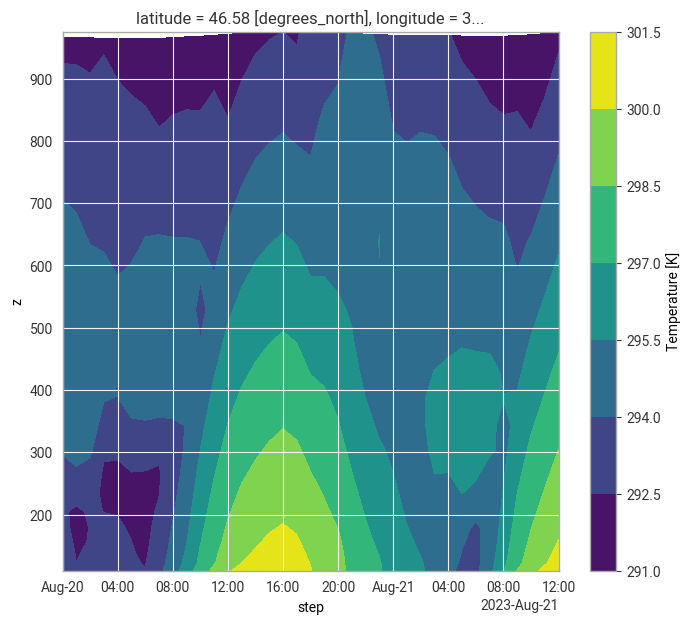

In [9]:
new.plot.contourf(x="step",y="z")
#new.plot.pcolormesh(x="step",y="z")